In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatRangeSlider, Checkbox, FloatSlider, Layout

CSV_INPUT = "/Users/xiaodong/Desktop/UOX-data/UOX1/ICFuox1min15p.csv"
CSV_FILTERED_OUTPUT_BASENAME = "filtered_centers.csv"  # We'll create the output in the same folder

# Attempt to load the CSV file
try:
    df = pd.read_csv(CSV_INPUT)
    print(f"Loaded {len(df)} rows from {CSV_INPUT}")
except FileNotFoundError:
    print(f"ERROR: The file {CSV_INPUT} was not found. Please check the path.")
    df = pd.DataFrame()

# Define default range values for the sliders from the dataset
x_min_default = df['center_x'].min() if not df.empty else 0
x_max_default = df['center_x'].max() if not df.empty else 1000

y_min_default = df['center_y'].min() if not df.empty else 0
y_max_default = df['center_y'].max() if not df.empty else 1000

def filter_and_plot(x_range, y_range, remove_outliers, outlier_std):
    """
    Filter the DataFrame (df) by center_x and center_y ranges, optionally remove outliers,
    and display a scatter plot along with histograms of the filtered data.
    
    Parameters
    ----------
    x_range : tuple(float, float)
        The (min, max) range for 'center_x'.
    y_range : tuple(float, float)
        The (min, max) range for 'center_y'.
    remove_outliers : bool
        Whether to remove outliers from the filtered data.
    outlier_std : float
        The threshold in standard deviations for outlier removal.
    """
    if df.empty:
        print("No data loaded. Exiting.")
        return

    # Unpack the slider values
    x_min, x_max = x_range
    y_min, y_max = y_range
    
    # Filter the data by slider range
    filtered = df[
        (df['center_x'] >= x_min) & (df['center_x'] <= x_max) &
        (df['center_y'] >= y_min) & (df['center_y'] <= y_max)
    ]
    
    # Optionally remove outliers based on standard deviation threshold
    if remove_outliers:
        # Calculate means and standard deviations on the filtered data
        x_mean = filtered['center_x'].mean()
        x_std = filtered['center_x'].std()
        y_mean = filtered['center_y'].mean()
        y_std = filtered['center_y'].std()
        
        # Remove rows where either coordinate is more than outlier_std standard deviations from the mean
        filtered = filtered[
            (abs(filtered['center_x'] - x_mean) <= outlier_std * x_std) &
            (abs(filtered['center_y'] - y_mean) <= outlier_std * y_std)
        ]
        print(f"Outliers removed using threshold: {outlier_std} standard deviations.")
    
    # Print out descriptive statistics
    print("=== Filtered Data Statistics ===")
    print(f"Number of rows: {len(filtered)}")
    for col in ['center_x', 'center_y']:
        mean_val = filtered[col].mean()
        median_val = filtered[col].median()
        std_val = filtered[col].std()
        print(f"{col} => mean: {mean_val:.3f}, median: {median_val:.3f}, std: {std_val:.3f}")
    
    # Save the filtered data to a new CSV file in the same folder
    output_folder = os.path.dirname(CSV_INPUT)
    output_filename = os.path.join(output_folder, CSV_FILTERED_OUTPUT_BASENAME)
    filtered.to_csv(output_filename, index=False)
    print(f"\nFiltered CSV saved to: {output_filename}\n")
    
    # Plot the scatter of the filtered centers
    plt.figure(figsize=(8, 6))
    plt.scatter(filtered['center_x'], filtered['center_y'], marker='o')
    plt.xlabel('Center X')
    plt.ylabel('Center Y')
    plt.title('Scatter Plot of Center Coordinates')
    plt.grid(True)
    plt.show()
    
    # Plot histogram for center_x
    plt.figure(figsize=(8, 6))
    plt.hist(filtered['center_x'], bins=30, edgecolor='black')
    plt.xlabel('Center X')
    plt.ylabel('Frequency')
    plt.title('Histogram of Center X')
    plt.grid(True)
    plt.show()
    
    # Plot histogram for center_y
    plt.figure(figsize=(8, 6))
    plt.hist(filtered['center_y'], bins=30, edgecolor='black')
    plt.xlabel('Center Y')
    plt.ylabel('Frequency')
    plt.title('Histogram of Center Y')
    plt.grid(True)
    plt.show()

# Create an interactive widget for filtering with outlier removal option
_ = interact(
    filter_and_plot,
    x_range=FloatRangeSlider(
        value=(x_min_default, x_max_default),
        min=x_min_default, max=x_max_default, step=0.1,
        description='X range',
        layout=Layout(width='800px')
    ),
    y_range=FloatRangeSlider(
        value=(y_min_default, y_max_default),
        min=y_min_default, max=y_max_default, step=0.1,
        description='Y range',
        layout=Layout(width='800px')
    ),
    remove_outliers=Checkbox(
        value=False,
        description='Remove Outliers'
    ),
    outlier_std=FloatSlider(
        value=3.0,
        min=1.0, max=5.0, step=0.1,
        description='Outlier Std'
    )
)


Loaded 6280 rows from /Users/xiaodong/Desktop/UOX-data/UOX1/ICFuox1min15p.csv


interactive(children=(FloatRangeSlider(value=(496.69368871063966, 609.1286490767579), description='X range', l…

Loaded filtered data (6003 rows) from /Users/xiaodong/Desktop/UOX-data/UOX1/filtered_centers.csv


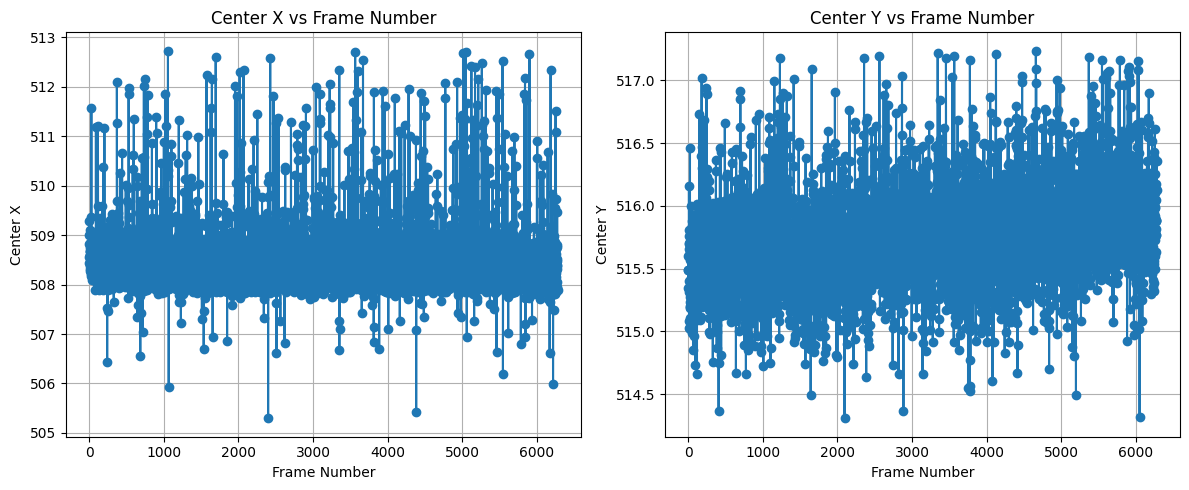

In [2]:

filtered_csv_path = os.path.join(os.path.dirname(CSV_INPUT), CSV_FILTERED_OUTPUT_BASENAME)
try:
    df_filtered = pd.read_csv(filtered_csv_path)
    print(f"Loaded filtered data ({len(df_filtered)} rows) from {filtered_csv_path}")
except FileNotFoundError:
    print("ERROR: filtered_centers.csv not found. Have you run the filtering above?")
    df_filtered = pd.DataFrame()

if not df_filtered.empty:
    plt.figure(figsize=(12, 5))
    
    # Left subplot: center_x vs frame_number
    plt.subplot(1, 2, 1)
    plt.plot(df_filtered["frame_number"], df_filtered["center_x"], marker='o')
    plt.title("Center X vs Frame Number")
    plt.xlabel("Frame Number")
    plt.ylabel("Center X")
    plt.grid(True)

    # Right subplot: center_y vs frame_number
    plt.subplot(1, 2, 2)
    plt.plot(df_filtered["frame_number"], df_filtered["center_y"], marker='o')
    plt.title("Center Y vs Frame Number")
    plt.xlabel("Frame Number")
    plt.ylabel("Center Y")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


In [ ]:
# %matplotlib qt
import os
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from ipyfilechooser import FileChooser
from IPython.display import display, clear_output

# Import lowess for smoothing
from statsmodels.nonparametric.smoothers_lowess import lowess

# Import the helper function to update the H5 file.
from update_h5 import create_updated_h5

# -------------------------
# Section 1: Shift Centers in CSV with Optional Smoothing and Visualization
# -------------------------

# File chooser widget for selecting the input CSV file.
csv_file_chooser = FileChooser(os.getcwd())
csv_file_chooser.title = "Select Input CSV File"
csv_file_chooser.filter_pattern = "*.csv"

# Widgets for shift parameters.
shift_x_widget = widgets.FloatText(
    value=0,
    description="Shift X:",
    layout=widgets.Layout(width="200px")
)
shift_y_widget = widgets.FloatText(
    value=0,
    description="Shift Y:",
    layout=widgets.Layout(width="200px")
)

# Widget for selecting smoothing method.
smoothing_method_widget = widgets.Dropdown(
    options=[("None", "none"), ("Lowess Smoothing", "lowess")],
    value="none",
    description="Smoothing:",
    layout=widgets.Layout(width="200px")
)

# Widget for adjusting lowess smoothing fraction.
lowess_frac_widget = widgets.FloatSlider(
    value=0.1,
    min=0.01,
    max=1.0,
    step=0.01,
    description="Lowess frac:",
    continuous_update=False,
    layout=widgets.Layout(width="300px")
)

# Button to trigger the shifting process.
process_csv_button = widgets.Button(
    description="Shift Centers and Save CSV",
    button_style="primary"
)

# Output widget for CSV shifting logs and visualization.
csv_output = widgets.Output(layout={'border': '1px solid black', 'padding': '5px'})

# Global variable to store the path of the shifted CSV.
shifted_csv_path = None

def on_process_csv_clicked(b):
    global shifted_csv_path
    with csv_output:
        clear_output()
        input_csv = csv_file_chooser.selected
        if not input_csv:
            print("Please select an input CSV file.")
            return

        shift_x = shift_x_widget.value
        shift_y = shift_y_widget.value
        
        # Compute output CSV path.
        shifted_csv_path = os.path.join(
            os.path.dirname(input_csv),
            f"centers_shifted_{shift_x}_{shift_y}.csv"
        )
        
        try:
            df = pd.read_csv(input_csv)
        except Exception as e:
            print("Error reading CSV:", e)
            return
        
        # Check required columns.
        if 'center_x' not in df.columns or 'center_y' not in df.columns:
            print("CSV must contain 'center_x' and 'center_y' columns.")
            return
        
        # Apply the shifts.
        df['center_x'] = df['center_x'] + shift_x
        df['center_y'] = df['center_y'] + shift_y

        # Store original shifted data for visualization.
        original_x = df['center_x'].copy()
        original_y = df['center_y'].copy()
        
        # Apply smoothing if selected.
        if smoothing_method_widget.value == "lowess":
            frac = lowess_frac_widget.value
            df['center_x'] = lowess(df['center_x'], df.index, frac=frac, return_sorted=False)
            df['center_y'] = lowess(df['center_y'], df.index, frac=frac, return_sorted=False)
            print(f"Lowess smoothing applied with frac = {frac}")
            
            # Visualization: Plot original vs. smoothed values.
            fig, axs = plt.subplots(1, 2, figsize=(12, 5))
            
            axs[0].plot(original_x, label='Original X', marker='o', linestyle='--', markersize=4)
            axs[0].plot(df['center_x'], label='Smoothed X', marker='o', linestyle='-', markersize=4)
            axs[0].set_title('Center X Smoothing')
            axs[0].legend()
            
            axs[1].plot(original_y, label='Original Y', marker='o', linestyle='--', markersize=4)
            axs[1].plot(df['center_y'], label='Smoothed Y', marker='o', linestyle='-', markersize=4)
            axs[1].set_title('Center Y Smoothing')
            axs[1].legend()
            
            plt.show()
        else:
            print("No smoothing applied.")
        
        # Save the updated DataFrame.
        df.to_csv(shifted_csv_path, index=False)
        print(f"Shifted (and optionally smoothed) centers saved to: {shifted_csv_path}")

process_csv_button.on_click(on_process_csv_clicked)

csv_ui = widgets.VBox([
    widgets.HTML("<h2>Shift Centers in CSV</h2>"),
    csv_file_chooser,
    widgets.HBox([shift_x_widget, shift_y_widget]),
    widgets.HBox([smoothing_method_widget, lowess_frac_widget]),
    process_csv_button,
    csv_output
])

# -------------------------
# Section 2: Update H5 with Shifted Centers
# -------------------------

# File chooser widget for selecting the H5 image file.
image_file_chooser_h5 = FileChooser(os.getcwd())
image_file_chooser_h5.title = "Select H5 Image File for Updating"
image_file_chooser_h5.filter_pattern = "*.h5"

# Button to trigger the H5 update process.
update_h5_button = widgets.Button(
    description="Update H5 with Shifted Centers",
    button_style="primary"
)

# Output widget for H5 update logs.
h5_output = widgets.Output(layout={'border': '1px solid black', 'padding': '5px'})

def on_update_h5_clicked(b):
    with h5_output:
        clear_output()
        if shifted_csv_path is None:
            print("No shifted CSV available. Please run the CSV shifting process first.")
            return
        
        image_file = image_file_chooser_h5.selected
        if not image_file:
            print("Please select an H5 image file.")
            return
        
        # Compute the output H5 file path.
        new_h5_path = os.path.join(
            os.path.dirname(image_file),
            os.path.splitext(os.path.basename(image_file))[0] + os.path.basename(shifted_csv_path)
        )
        
        try:
            create_updated_h5(image_file, new_h5_path, shifted_csv_path)
            print(f"Updated H5 file created at: {new_h5_path}")
        except Exception as e:
            print("Error updating H5 file:", e)

update_h5_button.on_click(on_update_h5_clicked)

h5_ui = widgets.VBox([
    widgets.HTML("<h2>Update H5 with Shifted Centers</h2>"),
    image_file_chooser_h5,
    update_h5_button,
    h5_output
])

# Combine both sections into the final UI.
ui = widgets.VBox([csv_ui, h5_ui])
display(ui)


In [1]:
import os
import pandas as pd
import ipywidgets as widgets
from ipyfilechooser import FileChooser
from IPython.display import display, clear_output

# Import the helper function to update the H5 file.
from update_h5 import create_updated_h5

# -------------------------
# Section 1: Shift Centers in CSV
# -------------------------

# File chooser widget for selecting the input CSV file.
csv_file_chooser = FileChooser(os.getcwd())
csv_file_chooser.title = "Select Input CSV File"
csv_file_chooser.filter_pattern = "*.csv"

# Widgets for shift parameters.
shift_x_widget = widgets.FloatText(
    value=0,
    description="Shift X:",
    layout=widgets.Layout(width="200px")
)
shift_y_widget = widgets.FloatText(
    value=0,
    description="Shift Y:",
    layout=widgets.Layout(width="200px")
)

# Button to trigger the shifting process.
process_csv_button = widgets.Button(
    description="Shift Centers and Save CSV",
    button_style="primary"
)

# Output widget for CSV shifting logs.
csv_output = widgets.Output(layout={'border': '1px solid black', 'padding': '5px'})

# Global variable to store the path of the shifted CSV.
shifted_csv_path = None

def on_process_csv_clicked(b):
    global shifted_csv_path
    with csv_output:
        clear_output()
        input_csv = csv_file_chooser.selected
        if not input_csv:
            print("Please select an input CSV file.")
            return

        shift_x = shift_x_widget.value
        shift_y = shift_y_widget.value
        
        # Compute output CSV path.
        shifted_csv_path = os.path.join(
            os.path.dirname(input_csv),
            f"centers_shifted_{shift_x}_{shift_y}.csv"
        )
        
        try:
            df = pd.read_csv(input_csv)
        except Exception as e:
            print("Error reading CSV:", e)
            return
        
        # Check required columns.
        if 'center_x' not in df.columns or 'center_y' not in df.columns:
            print("CSV must contain 'center_x' and 'center_y' columns.")
            return
        
        # Apply the shifts.
        df['center_x'] = df['center_x'] + shift_x
        df['center_y'] = df['center_y'] + shift_y
        
        # Save the updated DataFrame.
        df.to_csv(shifted_csv_path, index=False)
        print(f"Shifted centers saved to: {shifted_csv_path}")

process_csv_button.on_click(on_process_csv_clicked)

csv_ui = widgets.VBox([
    widgets.HTML("<h2>Shift Centers in CSV</h2>"),
    csv_file_chooser,
    widgets.HBox([shift_x_widget, shift_y_widget]),
    process_csv_button,
    csv_output
])

# -------------------------
# Section 2: Update H5 with Shifted Centers
# -------------------------

# File chooser widget for selecting the H5 image file.
image_file_chooser_h5 = FileChooser(os.getcwd())
image_file_chooser_h5.title = "Select H5 Image File for Updating"
image_file_chooser_h5.filter_pattern = "*.h5"

# Button to trigger the H5 update process.
update_h5_button = widgets.Button(
    description="Update H5 with Shifted Centers",
    button_style="primary"
)

# Output widget for H5 update logs.
h5_output = widgets.Output(layout={'border': '1px solid black', 'padding': '5px'})

def on_update_h5_clicked(b):
    with h5_output:
        clear_output()
        if shifted_csv_path is None:
            print("No shifted CSV available. Please run the CSV shifting process first.")
            return
        
        image_file = image_file_chooser_h5.selected
        if not image_file:
            print("Please select an H5 image file.")
            return
        
        # Compute the output H5 file path.
        new_h5_path = os.path.join(
            os.path.dirname(image_file),
            # os.path.splitext(os.path.basename(image_file))[0] + "_centersshifted.h5"
            os.path.splitext(os.path.basename(image_file))[0] + os.path.basename(shifted_csv_path)
        )
        
        try:
            create_updated_h5(image_file, new_h5_path, shifted_csv_path)
            print(f"Updated H5 file created at: {new_h5_path}")
        except Exception as e:
            print("Error updating H5 file:", e)

update_h5_button.on_click(on_update_h5_clicked)

h5_ui = widgets.VBox([
    widgets.HTML("<h2>Update H5 with Shifted Centers</h2>"),
    image_file_chooser_h5,
    update_h5_button,
    h5_output
])

# Combine both sections into the final UI.
ui = widgets.VBox([csv_ui, h5_ui])
display(ui)
